In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'pdfs'#'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


In [3]:
study.splicing.feature_expression_id_col = 'ensembl_id'

In [4]:
study.supplemental.modalities_tidy = study.supplemental.modalities_tidy.replace(
    {'modality': {'ambivalent': 'uncategorized', 'concurrent': 'middle'}})

In [5]:
not_excluded_included = 'bimodal', 'middle', 'uncategorized'

In [23]:
go_dfs = []
feature_dfs = []

for phenotype, df in study.supplemental.modalities_tidy.groupby('phenotype'):
    background_events = df['event_id']
    modalities = df.query('modality in @not_excluded_included')
    foreground_events = modalities['event_id']
    
    feature_data = study.splicing.feature_data.loc[foreground_events, ['ensembl_id', 'gene_name']]
    feature_data = feature_data.join(study.expression.feature_data[['gerstberger2014_tf', 'gerstberger2014_rbp']], 
                                     on='ensembl_id')
#     feature_data['phenotype'] = phenotype
    feature_data = feature_data.join(modalities.set_index('event_id'))
    feature_dfs.append(feature_data)
    
    background_genes = study.splicing.splicing_to_expression_id(background_events)
    foreground_genes = study.splicing.splicing_to_expression_id(foreground_events)
    
    go_df = study.go_enrichment(foreground_genes, background=background_genes, domain='biological_process', )
#                                 min_background_size=10, min_feature_size=5)
    go_df['phenotype'] = phenotype
    print go_df.head()
    go_dfs.append(go_df.reset_index())
    
metadata = pd.concat(feature_dfs)
go = pd.concat(go_dfs)
go.head()

                              features_of_interest_in_go_term  \
GO:0008380  ENSG00000163634,ENSG00000173933,ENSG0000010884...   
GO:0006397  ENSG00000122566,ENSG00000131051,ENSG0000016363...   
GO:0006396  ENSG00000131051,ENSG00000173933,ENSG0000008893...   
GO:0006468  ENSG00000013441,ENSG00000047315,ENSG0000016800...   
GO:0016568  ENSG00000123562,ENSG00000141027,ENSG0000025831...   

                 features_of_interest_in_go_term_gene_symbols  \
GO:0008380  THOC7,RBM4,LUC7L3,SRSF7,PCBP2,DHX8,HNRNPK,MAGO...   
GO:0006397  HNRNPA2B1,RBM39,THOC7,LSM2,RBM4,LUC7L3,XRN2,EL...   
GO:0006396  RBM39,RBM4,XRN2,SYNCRIP,RBM14-RBM4,DHX8,HNRNPK...   
GO:0006468  CLK1,POLR2B,POLR2G,MAPK6,DGUOK,PRKACB,CDC42BPA...   
GO:0016568               MORF4L2,NCOR1,C17orf49,BAG6,SMARCAD1   

                     go_domain                  go_name  \
GO:0008380  biological_process             RNA splicing   
GO:0006397  biological_process          mRNA processing   
GO:0006396  biological_process           

,index,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value,phenotype
0,GO:0008380,"ENSG00000163634,ENSG00000173933,ENSG0000010884...","THOC7,RBM4,LUC7L3,SRSF7,PCBP2,DHX8,HNRNPK,MAGO...",biological_process,RNA splicing,66,26,268,5.301144e-08,0.000006,MN
1,GO:0006397,"ENSG00000122566,ENSG00000131051,ENSG0000016363...","HNRNPA2B1,RBM39,THOC7,LSM2,RBM4,LUC7L3,XRN2,EL...",biological_process,mRNA processing,45,19,240,6.179612e-07,0.000075,MN
2,GO:0006396,"ENSG00000131051,ENSG00000173933,ENSG0000008893...","RBM39,RBM4,XRN2,SYNCRIP,RBM14-RBM4,DHX8,HNRNPK...",biological_process,RNA processing,18,10,97,4.702409e-06,0.000574,MN
3,GO:0006468,"ENSG00000013441,ENSG00000047315,ENSG0000016800...","CLK1,POLR2B,POLR2G,MAPK6,DGUOK,PRKACB,CDC42BPA...",biological_process,protein phosphorylation,21,10,648,3.491659e-05,0.004260,MN
4,GO:0016568,"ENSG00000123562,ENSG00000141027,ENSG0000025831...","MORF4L2,NCOR1,C17orf49,BAG6,SMARCAD1",biological_process,chromatin modification,7,5,124,4.630553e-05,0.005649,MN


In [17]:
metadata.head()

,ensembl_id,gene_name,gerstberger2014_tf,gerstberger2014_rbp
event_id,,,,
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,ENSG00000166171,DPCD,False,False
exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,ENSG00000198408,MGEA5,False,False
exon:chr10:104209950-104210087:+@exon:chr10:104211156-104211312:+@exon:chr10:104215094-104215184:+,ENSG00000269609,RP11-18I14.10,False,False
exon:chr10:1094804-1095110:-@exon:chr10:1089939-1090111:-@exon:chr10:1089241-1089333:-,ENSG00000067064,IDI1,False,False
exon:chr10:120101782-120101827:-@exon:chr10:120101239-120101439:-@exon:chr10:120095694-120095935:-,ENSG00000165669,FAM204A,False,False


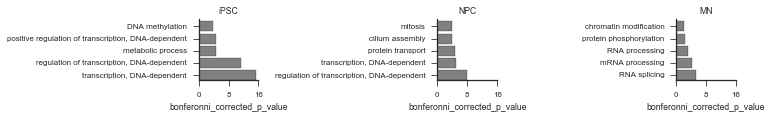

In [46]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

sns.set(style='ticks', context='paper')

g = sns.FacetGrid(go, col='phenotype', aspect=2, size=1.75, sharey=False, col_order=study.phenotype_order)
g.map_dataframe(plot_go_enrichment, 'bonferonni_corrected_p_value', max_categories=5, color='grey')
g.set_titles('{col_name}')
ax = plt.gca()
ax.set(xticks=[0, 8, 16]);
g.fig.savefig('{}/bimodal_go_enrichment.pdf'.format(folder))

In [25]:
go.head()

,index,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value,phenotype
0,GO:0008380,"ENSG00000163634,ENSG00000173933,ENSG0000010884...","THOC7,RBM4,LUC7L3,SRSF7,PCBP2,DHX8,HNRNPK,MAGO...",biological_process,RNA splicing,66,26,268,5.301144e-08,0.000006,MN
1,GO:0006397,"ENSG00000122566,ENSG00000131051,ENSG0000016363...","HNRNPA2B1,RBM39,THOC7,LSM2,RBM4,LUC7L3,XRN2,EL...",biological_process,mRNA processing,45,19,240,6.179612e-07,0.000075,MN
2,GO:0006396,"ENSG00000131051,ENSG00000173933,ENSG0000008893...","RBM39,RBM4,XRN2,SYNCRIP,RBM14-RBM4,DHX8,HNRNPK...",biological_process,RNA processing,18,10,97,4.702409e-06,0.000574,MN
3,GO:0006468,"ENSG00000013441,ENSG00000047315,ENSG0000016800...","CLK1,POLR2B,POLR2G,MAPK6,DGUOK,PRKACB,CDC42BPA...",biological_process,protein phosphorylation,21,10,648,3.491659e-05,0.004260,MN
4,GO:0016568,"ENSG00000123562,ENSG00000141027,ENSG0000025831...","MORF4L2,NCOR1,C17orf49,BAG6,SMARCAD1",biological_process,chromatin modification,7,5,124,4.630553e-05,0.005649,MN


In [26]:
go.to_csv('bimodal_middle_uncategorized_go_enrichment.csv', index=False)

In [27]:
metadata.head()

,ensembl_id,gene_name,gerstberger2014_tf,gerstberger2014_rbp,phenotype,modality
event_id,,,,,,
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,ENSG00000166171,DPCD,False,False,MN,bimodal
exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,ENSG00000198408,MGEA5,False,False,MN,bimodal
exon:chr10:104209950-104210087:+@exon:chr10:104211156-104211312:+@exon:chr10:104215094-104215184:+,ENSG00000269609,RP11-18I14.10,False,False,MN,bimodal
exon:chr10:1094804-1095110:-@exon:chr10:1089939-1090111:-@exon:chr10:1089241-1089333:-,ENSG00000067064,IDI1,False,False,MN,bimodal
exon:chr10:120101782-120101827:-@exon:chr10:120101239-120101439:-@exon:chr10:120095694-120095935:-,ENSG00000165669,FAM204A,False,False,MN,bimodal


In [28]:
metadata.to_csv('bimodal_middle_uncategorized_metadata.csv')